<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 2</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **md.2**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare un kernel python.

<center>

`module load python3/anaconda`
<center>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm

<center>

## Algoritmo di Verlet

Per migliorare i risultati ottenuti con l'algoritmo di Eulero, il modo più semplice di agire è di troncare la serie di Taylor ad ordini più alti. L'algoritmo di Verlet si basa su due espansioni delle posizioni che si arrestano al terzo ordine.

$$
\begin{cases}
\displaystyle \vec{r_i}\left(t+\Delta t\right)\,=\,\vec{r_i}\left(t\right)\,+\,\frac{d\vec{r_i}\left(t\right)}{dt}\Delta t\,+\,\frac{1}{2}\frac{d^2 \vec{r_i}\left(t\right)}{dt^2}\Delta t^2\,+\,\frac{1}{6}\frac{d^3 \vec{r_i}\left(t\right)}{dt^3}\Delta t^3\,+\,\mathcal{O}(\Delta t^4) \\
\\
\displaystyle \vec{r_i}\left(t-\Delta t\right)\,=\,\vec{r_i}\left(t\right)\,-\,\frac{d\vec{r_i}\left(t\right)}{dt}\Delta t\,+\,\frac{1}{2}\frac{d^2 \vec{r_i}\left(t\right)}{dt^2}\Delta t^2\,-\,\frac{1}{6}\frac{d^3 \vec{r_i}\left(t\right)}{dt^3}\Delta t^3\,+\,\mathcal{O}(\Delta t^4) \\
\end{cases}
$$

Le due espansioni sono relative alla posizione al tempo $t\,+\,\Delta t$ e $t\,-\,\Delta t$: per costruzione l'algoritmo di Verlet è simmetrico per inversione temporale. Notiamo inoltre che i termini contenenti le derivate di ordine dispari presentano segno opposto e si cancellano nel momento in cui sommiamo le due espressioni membro a membro. Sfruttando il secondo principio della dinamica, abbiamo

$$
\vec{r_i}\left(t+\Delta t\right)\,+\,\vec{r_i}\left(t-\Delta t\right)\,=\,2\vec{r_i}\left(t\right)\,+\,\frac{1}{m_i}\vec{f_i}\left(\vec{r_i}\left(t\right)\right)\Delta t^2\,+\,\mathcal{O}(\Delta t^4),
$$

ossia la posizione può essere valutata direttamente dalle forze. Le velocità possono essere invece calcolate come rapporto incrementale centrato al tempo t.

$$
\vec{v_i}\left(t\right)\,=\,\frac{\vec{r_i}\left(t+\Delta t\right)\,-\,\vec{r_i}\left(t-\Delta t\right)}{2\Delta t}
$$

Un problema dell'integratore di Verlet è che non può essere utilizzato per il primo step della simulazione, perchè la posizione al tempo successivo dipende non da una singola configurazione, ma da due. Solitamente si utilizza l'algoritmo di Eulero per il primo step, per poi procedere con Verlet nel momento in cui si hanno informazioni su due istanti temporali. L'algoritmo di Verlet è simplettico, a differenza dell'algoritmo di Eulero, e garantisce che le fluttuazioni dell'energia rimangano limitate nel tempo, preservando un comportamento realistico anche in simulazioni di lunga durata

<center>

## Velocity verlet

L'algoritmo Velocity Verlet consente di evitare alcuni inconventi dell'algoritmo di Verlet, in quanto non serve tenere in memoria le due configurazioni precedenti, ma solamente l'ultima. Si basa su un'espansione di Taylor al secondo ordine per le posizioni ed una al primo ordine per le velocità.

$$
\begin{cases}
\displaystyle \vec{r_i}\left(t+\Delta t\right)\,=\,\vec{r_i}\left(t\right)\,+\,\frac{d\vec{r_i}\left(t\right)}{dt}\Delta t\,+\,\frac{1}{2}\frac{d^2 \vec{r_i}\left(t\right)}{dt^2}\Delta t^2\,+\,\mathcal{O}(\Delta t^2) \\
\\
\displaystyle \vec{v_i}\left(t+\Delta t\right)\,=\,\vec{v_i}\left(t\right)\,+\,\frac{d\vec{v_i}\left(t\right)}{dt}\Delta t\,+\,\mathcal{O}(\Delta t) \\
\end{cases}
$$

Andando a rimpiazzare le derivate della posizione con le definizioni note e valutando la derivata della velocità come media dell'accelerazione al tempo t ed a quello successivo, si ottiene che

$$
\begin{cases}
\displaystyle \vec{r_i}\left(t+\Delta t\right)\,=\,\vec{r_i}\left(t\right)\,+\,\vec{v_i}\left(t\right)\Delta t\,+\,\frac{\vec{f_i}\left(\vec{r_i}\left(t\right)\right)}{2 m_i}\Delta t^2\,+\,\mathcal{O}(\Delta t^2) \\
\\
\displaystyle \vec{v_i}\left(t+\Delta t\right)\,=\,\vec{v_i}\left(t\right)\,+\,\frac{\vec{f_i}\left(\vec{r_i}\left(t\,+\,\Delta t\right)\right)\,+\,\vec{f_i}\left(\vec{r_i}\left(t\right)\right)}{2m_i}\Delta t\,+\,\mathcal{O}(\Delta t) \\
\end{cases}
$$

Notiamo dalla seconda espressione che le velocità vengono aggiornate in due passaggi, inizialmente con le posizioni al tempo t e successivamente dopo aver effettuato l'upgrade delle $r_i$. Tale algoritmo è equivalente a quello standard per quanto riguarda la conservazione dell'energia.

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1.2</h1>

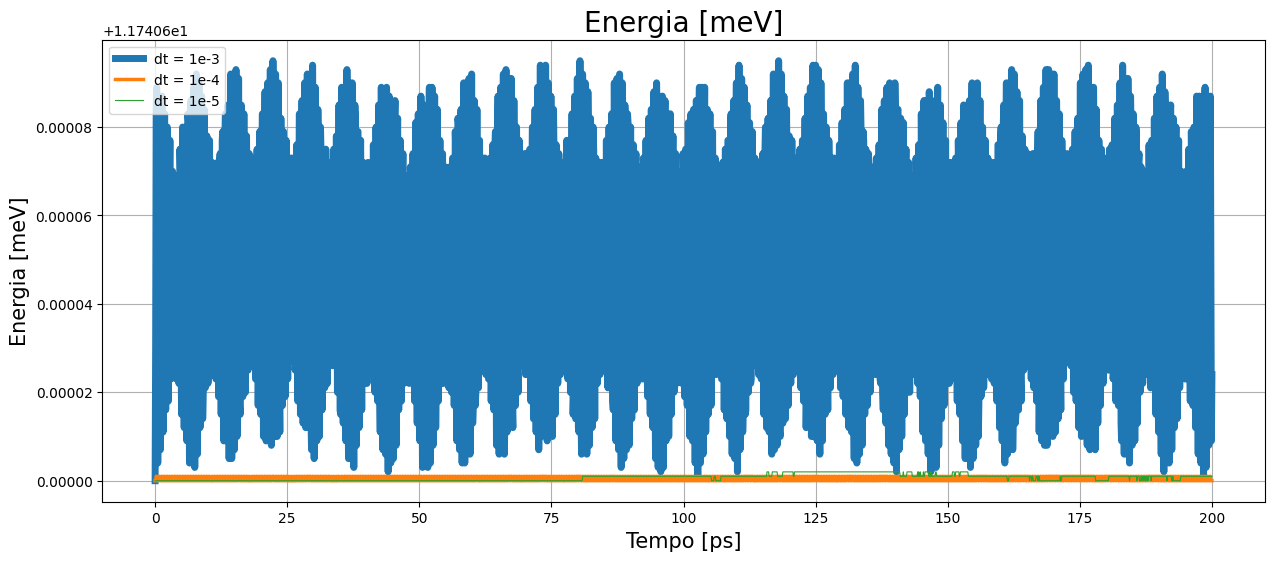

In [31]:
fig = plt.figure(figsize=(15, 6))
dt1 = np.loadtxt('dtVerlet/dt.1e-3.dat')
dt2 = np.loadtxt('dtVerlet/dt.1e-4.dat')
dt3 = np.loadtxt('dtVerlet/dt.1e-5.dat')

plt.plot(dt1[:, 0], dt1[:, 3], linewidth = 5, label = 'dt = 1e-3')
plt.plot(dt2[:, 0], dt2[:, 3], linewidth = 2.5, label = 'dt = 1e-4')
plt.plot(dt3[:, 0], dt3[:, 3], linewidth = 0.8, label = 'dt = 1e-5')

plt.ylabel(r"Energia [meV]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Energia [meV]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

Notiamo che si hanno delle oscillazioni in energia, che rimangono confinate durante la simulazione. L'ampiezza delle stesse risulta dipendente dal time step discreto preso in considerazione, ma il valore minimo dell'energia totale è lo stesso indipendentemente dal dt. Questo comportamento è differente rispetto a quello riscontrato nel caso dell'algoritmo di Eulero, in cui l'energia si discostava sensibilmente dal valore di partenza.

Le simulazioni precedenti riguardano una catena unidimensionale, il cui moto avviene solamente in una direzione precisa. Cambiamo ora l'input a quello di una catena tridimensionale, in modo tale da coinvolgere un numero più elevato di gradi di libertà e rendere evidente come, al variare del time step utilizzato, vari anche la lunghezza della catena. 

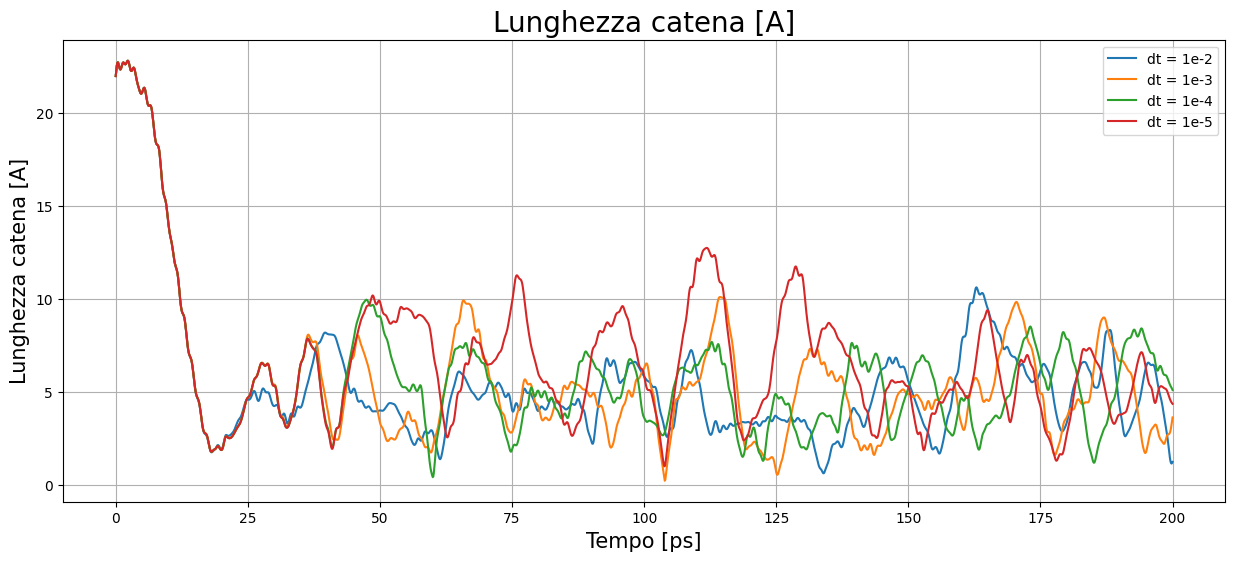

In [35]:
fig = plt.figure(figsize=(15, 6))
dt1 = np.loadtxt('dtVerlet/chLen/dt.1e-2.dat')
dt2 = np.loadtxt('dtVerlet/chLen/dt.1e-3.dat')
dt3 = np.loadtxt('dtVerlet/chLen/dt.1e-4.dat')
dt4 = np.loadtxt('dtVerlet/chLen/dt.1e-5.dat')

plt.plot(dt1[:, 0], dt1[:, 4], label = 'dt = 1e-2')
plt.plot(dt2[:, 0], dt2[:, 4], label = 'dt = 1e-3')
plt.plot(dt3[:, 0], dt3[:, 4], label = 'dt = 1e-4')
plt.plot(dt4[:, 0], dt4[:, 4], label = 'dt = 1e-5')

plt.ylabel(r"Lunghezza catena [A]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Lunghezza catena [A]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

Questo accade perchè, anche per un integratore simplettico, ogni approssimazione che coinvolga il troncamento dell'espansione in serie di Taylor determina un'errore che si accumula ad ogni iterazione, facendo in modo che la variazione di parametri quali l'intervallo temporale determini una differente dinamica del sistema.

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1.3</h1>

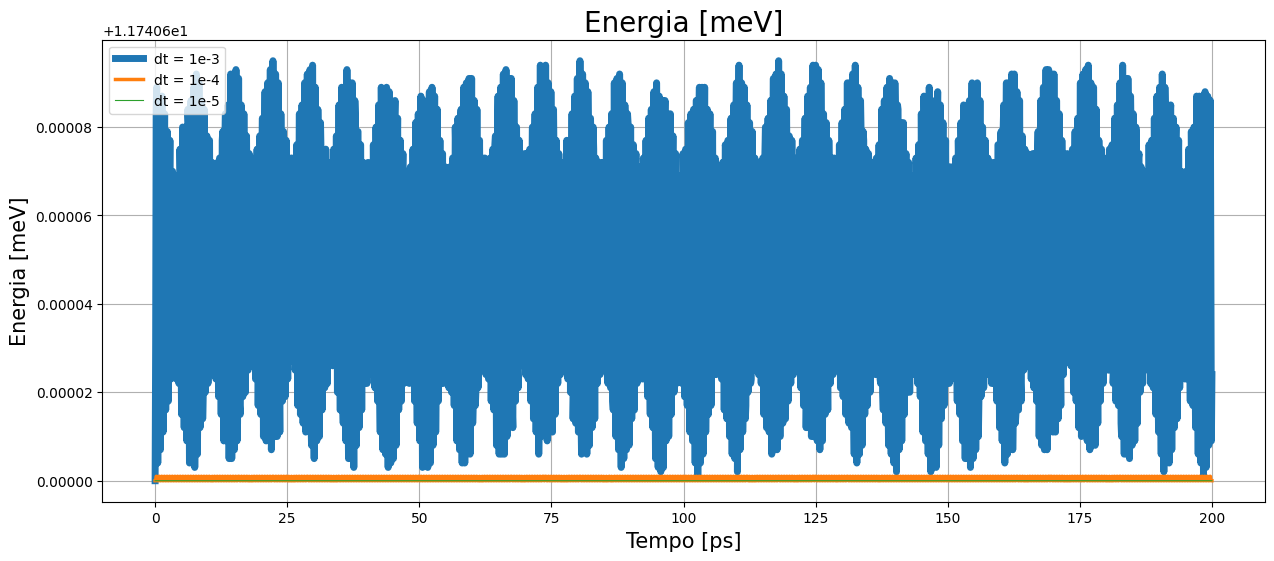

In [32]:
fig = plt.figure(figsize=(15, 6))
dt1 = np.loadtxt('dtVelVerlet/dt.1e-3.dat')
dt2 = np.loadtxt('dtVelVerlet/dt.1e-4.dat')
dt3 = np.loadtxt('dtVelVerlet/dt.1e-5.dat')

plt.plot(dt1[:, 0], dt1[:, 3], linewidth = 5, label = 'dt = 1e-3')
plt.plot(dt2[:, 0], dt2[:, 3], linewidth = 2.5, label = 'dt = 1e-4')
plt.plot(dt3[:, 0], dt3[:, 3], linewidth = 0.8, label = 'dt = 1e-5')

plt.ylabel(r"Energia [meV]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Energia [meV]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

Anche nel caso dell'algoritmo Velocity Verlet osserviamo che l'energia totale oscilla nel corso della simulazione, con ampiezza inferiore più piccolo è l'intervallo temporale utilizzato. L'energia totale si stabilizza al diminuire del timestep (in particolare il minimo valore d'energia rimane lo stesso per indipendentemente dal timestep). Osserviamo lo stesso comportamento precedente per quanto riguarda la lunghezza della catena masse-molle, con una deviazione dal valor vero dovuta alla finitezza del time-step preso in analisi.

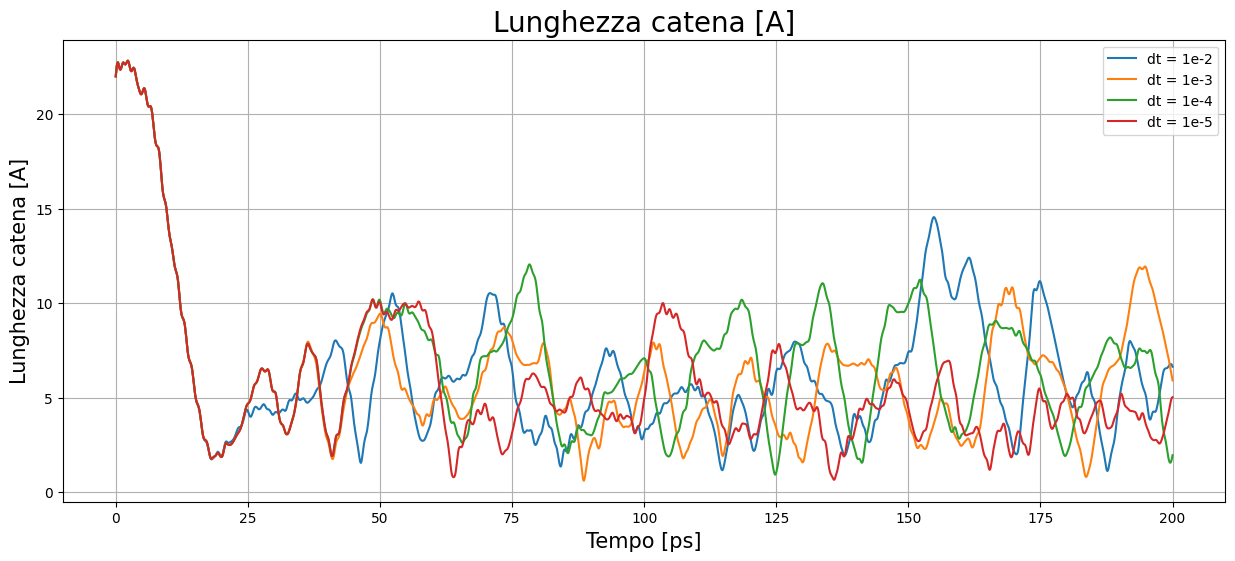

In [36]:
fig = plt.figure(figsize=(15, 6))
dt1 = np.loadtxt('dtVelVerlet/chLen/dt.1e-2.dat')
dt2 = np.loadtxt('dtVelVerlet/chLen/dt.1e-3.dat')
dt3 = np.loadtxt('dtVelVerlet/chLen/dt.1e-4.dat')
dt4 = np.loadtxt('dtVelVerlet/chLen/dt.1e-5.dat')

plt.plot(dt1[:, 0], dt1[:, 4], label = 'dt = 1e-2')
plt.plot(dt2[:, 0], dt2[:, 4], label = 'dt = 1e-3')
plt.plot(dt3[:, 0], dt3[:, 4], label = 'dt = 1e-4')
plt.plot(dt4[:, 0], dt4[:, 4], label = 'dt = 1e-5')

plt.ylabel(r"Lunghezza catena [A]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Lunghezza catena [A]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1.4</h1>

Le simulazioni performate fino ad ora sono state effettuate con le unità di misura:

$$
\begin{cases}
    \text{tempo}\,\qquad\rightarrow \quad\,ps \\
    \text{lunghezza}\,\,\,\,\rightarrow \quad\,\AA \\
    \text{energia}\quad\,\,\,\,\, \rightarrow \quad\,\textit{meV}
\end{cases}
$$

Dato che le unità di musura delle quantità di output dipendono da quelle che utilizziamo per l'imput, vogliamo ora provare a lavorare con

$$
\begin{cases}
    \text{tempo}\,\qquad\rightarrow \quad\,ns \\
    \text{lunghezza}\,\,\,\,\rightarrow \quad\,nm \\
    \text{energia}\quad\,\,\,\,\, \rightarrow \quad\,\textit{meV}
\end{cases}
$$

ossia vogliamo lasciare invariata l'unità di misura dell'energia, variando tuttavia quella temporale e quella spaziale. Se l'operazione di cambio delle unità di misura viene fatta coerentemente, nelle nuove unità la dinamica è la stessa, semplicemente riscalata.

<center>

## Confronto fra file dei parametri

</center>

<div style="display: flex;">

<div style="flex: 1; padding: 10px;">

### (ps, A, meV)

nstep		200000 <br>
print		100 <br>
mass		1.0 <br>
timestep	0.001 <br>
harmonic	10.0 <br>
distance	2.0 <br>
initialfile	initialchain3D.xyz <br>
trajfile	/dev/null <br>

</div>

<div style="flex: 1; padding: 10px;">

### (ns, nm, meV)

nstep		200000 <br>
print		100 <br>
mass		1e-4 <br>
timestep	1e-6 <br>
harmonic	1000.0 <br>
distance	0.2 <br>
initialfile	initialchain3D.res.xyz <br>
trajfile	/dev/null <br>

</div>

</div>

Chiaramente bisogna andare ad agire anche sui file che specificano la condizione iniziale, poichè essi sono definiti in termini delle unità di misura di input. I plot riportati successivamente sono stati ottenuti risolvendo le equazioni di Newton con l'integratore di Verlet, ed evidenziano come la dinamica del sistema sia la stessa.

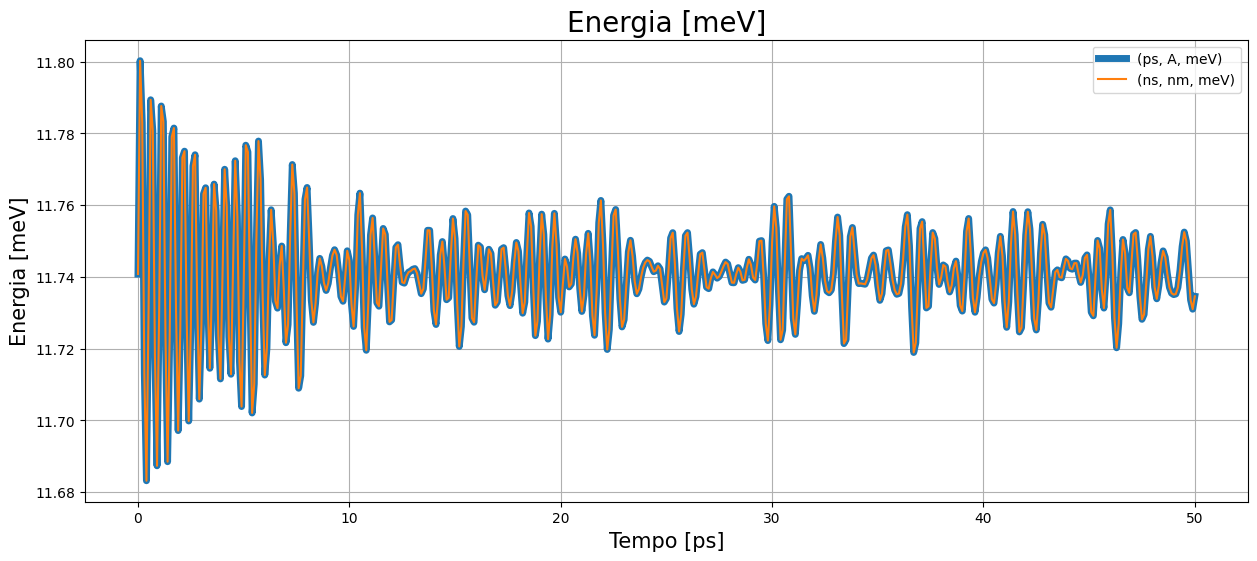

In [15]:
fig = plt.figure(figsize=(15, 6))
dt = np.loadtxt('confRiscalate/dt.1e-3.dat')
dt_res = np.loadtxt('confRiscalate/dt.res.1e-3.dat')

plt.plot(dt[:, 0], dt[:, 3], linewidth = 5, label = '(ps, A, meV)')
plt.plot(1000 * dt_res[:, 0], dt_res[:, 3], label = '(ns, nm, meV)')

plt.ylabel(r"Energia [meV]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Energia [meV]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

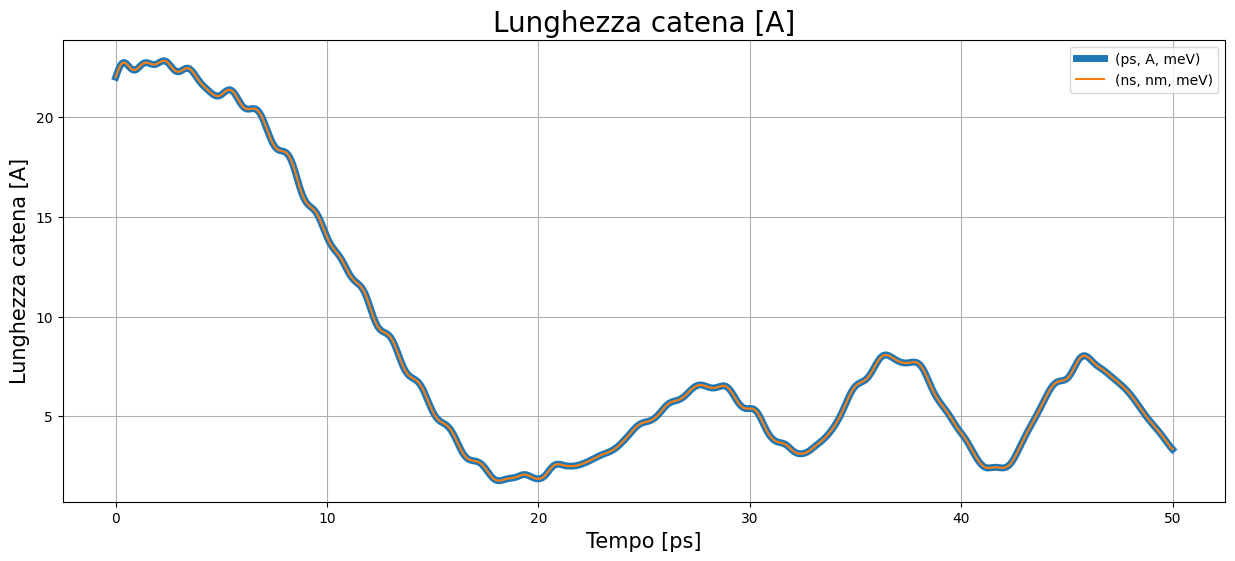

In [14]:
fig = plt.figure(figsize=(15, 6))
dt = np.loadtxt('confRiscalate/dt.1e-3.dat')
dt_res = np.loadtxt('confRiscalate/dt.res.1e-3.dat')

plt.plot(dt[:, 0], dt[:, 4], linewidth = 5, label = '(ps, A, meV)')
plt.plot(1000 * dt_res[:, 0], 10 * dt_res[:, 4], label = '(ns, nm, meV)')

plt.ylabel(r"Lunghezza catena [A]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Lunghezza catena [A]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1.5</h1>

Nel momento in cui non si hanno delle forze esterni agenti sulla catena di masse e molle, il momento del centro di massa e' conservato. Se una configurazione iniziale presenza momento totale diverso da zero, durante la simulazione tendera a spostarsi dalla regione iniziale.


<center>

![Simulazione senza correzione sulle velocita baricentrali](confTraj/siBar.gif)
</center>

Notiamo che se non applichiamo alcuna correzione, la catena tende a spostarsi. E' possibile 'congelare' questa dinamica macroscopica della catena masse-molle sottraendo a tutte le velocita delle singole particelle la velocita del centro di massa. Possiamo infatti apprezzare nella gif sottostante come ora la catena non si muova.

<center>

![Simulazione con correzione sulle velocita baricentrali](confTraj/noBar.gif)
</center>

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1.6 - 1.7</h1>

Le traiettorie nello spazio delle fasi di sistemi ergodici sono fortemente dipendenti dalle condizioni iniziali. In particolare, due traiettorie che hanno punti iniziali distanti $\delta_0$ nello spazio delle fasi, divergeranno esponenzialmente nel tempo seguendo una legge del tipo

$$
\delta\left(t\right)\,=\,e^{\lambda t} \delta_0,
$$

dove $\lambda$ è detto esponente di Lyapunov. La situazione che si verifica in un sistema integrabile è opposta, in quanto le traiettorie che iniziano vicine rimangono vicine per tutta la durata dell'evoluzione.

## Catena 1-D

Una catena uno-dimensionale costituita da masse e molle è un esempio di sistema integrabile. Questo è quanto si osserva lasciando evolvere per 200 ps due catene armoniche 1D per le quali la condizione iniziale differisce di 0.1 $\AA$ sulla coordinata x della prima massa.

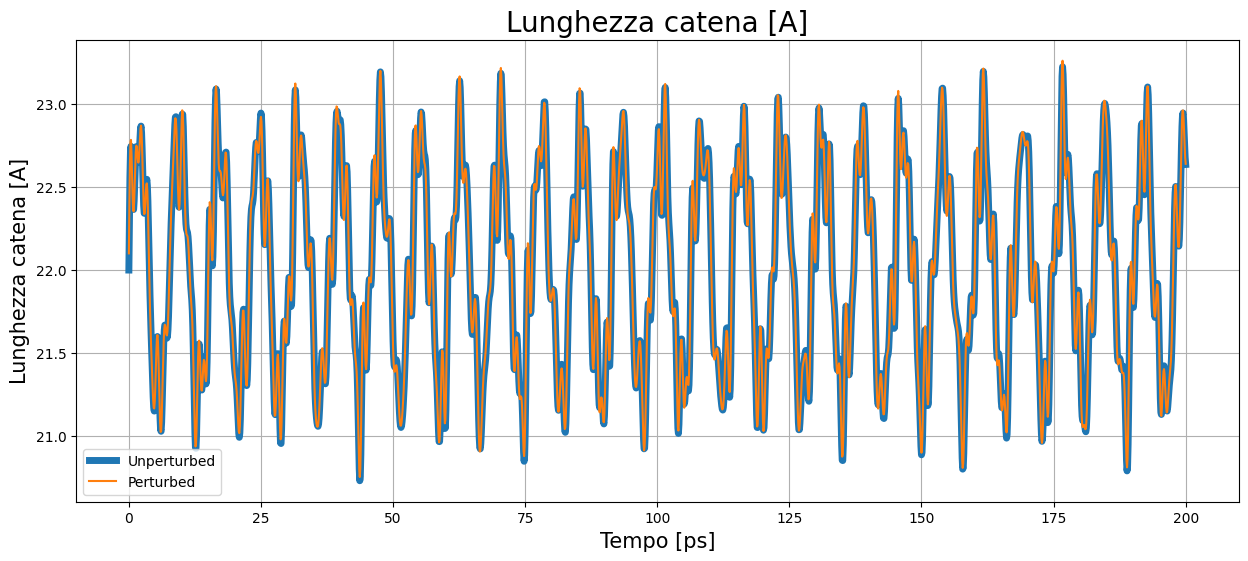

In [22]:
fig = plt.figure(figsize=(15, 6))
unper = np.loadtxt('dipInitial/sim1D/unperturbed.dat')
per = np.loadtxt('dipInitial/sim1D/perturbed.dat')

plt.plot(unper[:, 0], unper[:, 4], linewidth = 5, label = 'Unperturbed')
plt.plot(per[:, 0], per[:, 4], label = 'Perturbed')

plt.ylabel(r"Lunghezza catena [A]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Lunghezza catena [A]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

## Catena 3D

La situazione che si presenta in 3 dimensioni è nettamente differente, poichè la lunghezza della catena mostra una dipendenza sulla perturbazione applicata.

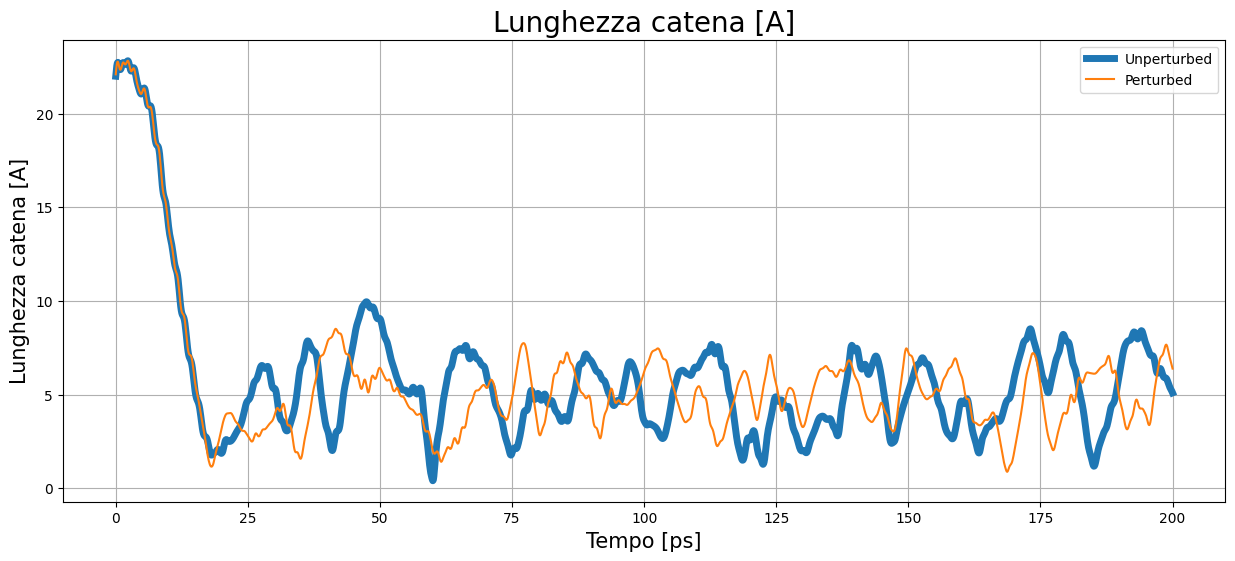

In [24]:
fig = plt.figure(figsize=(15, 6))
unper = np.loadtxt('dipInitial/sim3D/unperturbed.dat')
per = np.loadtxt('dipInitial/sim3D/perturbed.dat')

plt.plot(unper[:, 0], unper[:, 4], linewidth = 5, label = 'Unperturbed')
plt.plot(per[:, 0], per[:, 4], label = 'Perturbed')

plt.ylabel(r"Lunghezza catena [A]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Lunghezza catena [A]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1.8 </h1>

Il modo più rapido per calcolare la temperatura $T$ della catena di masse e molle è applicare il teorema di equipartizione, che in tre dimensioni lega le velocità dei costituenti alla temperatura del sistema come segue

$$
\frac{1}{2}\sum_{i=1}^N m_i \left|\vec{v_i}\right|^2 \, = \,\frac{3}{2}Nk_bT 
$$

Nel codice sorgente è necessaria una piccola modifica per aggiungere il calcolo di T, il quale si può direttamente appoggiare alla determinazione dell'energia cinetica. Per specificare la dimensionalità del problema ho aggiunto un nuovo parametro al file parameters.2 (dim, ossia la dimensionalità della catena in analisi). Tuttavia, per rendere la temperatura indipendente dal sistema di riferimento, si deve far sì che la catena non sia soggetta a roto-traslazioni macroscopiche, ossia il momento lineare ed angolare del centro di massa della catena armonica devono essere identicamente nulli.

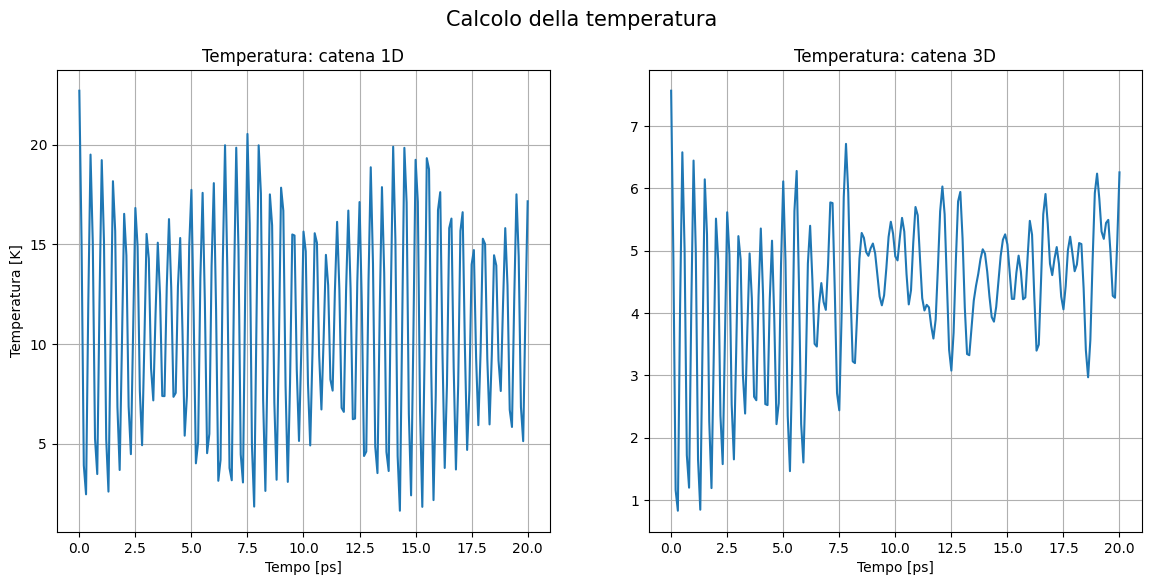

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
titoli = np.array(['Temperatura: catena 1D', 'Temperatura: catena 3D'])

for i in range(0, 2):
    appo = np.loadtxt('calcTemp/temp'+str(2*i+1)+'D.dat')
    ax[i].plot(appo[:, 0], appo[:, 5])

    if i==0:
        ax[i].set_ylabel('Temperatura [K]')
    ax[i].set_xlabel('Tempo [ps]')
    ax[i].set_title(titoli[i])
    ax[i].grid()

fig.suptitle('Calcolo della temperatura', fontsize = '15')
plt.show()

Dato che la configuazione 3D è ottenuta semplicemente andando a perturbare le posizioni della catena 1D sugli assi y e z, e quindi l'energia potenziale e cinetica iniziale rimangono circa le stesse, osserviamo un fattore tre fra gli output nel caso uni e tridimensionale.